<a href="https://colab.research.google.com/github/Kynikoi1/Math-273-Spring-2024/blob/main/DSE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ECE 131A Data science exploration 2:
Please complete this jupyter notebook by filling out the code blocks. Once you have completed the notebook, generate a PDF of the completed notebook and upload the PDF to Gradescope by 11:59 PM on 11/6/2024.

In this data science exploration, we will be performing basic statistical analysis on two real world datasets. The analysis will consist of plotting the empirical distribution of the quantities of interest in the dataset and visualizing how well the empirical distribution matches with some discrete probability distributions learned in the class. In the first part of the assignment, we will be analyzing an alpha particle emissions dataset. In the second part of the assignment, we will be analyzing a traffic violation dataset.

In [2]:
pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.5-py3-none-any.whl size=12468 sha256=0adc5a7f85037099b84f625f894cda2008c223e915bb07eea9eb0d77cfca98ff
  Stored in directory: /root/.cache/pip/wheels/0d/d0/ae/1ad4c7593703e55b2321b23b49d3b0d55261b59d7036d7045b
Successfully built empiricaldist


If you are using Google Colab, you need to uploade the two csv files `alpha_particle_emissions.csv` and `police_project.csv`

In [3]:
# # Only Uncomment if you are using Google Colab
from google.colab import files
uploaded = files.upload()

Saving police_project.csv to police_project.csv


In [4]:
## Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

Alpha emissions dataset: the data consists of measurements of alpha particle emissions from a sample of americium-241. The csv file contains a table with the frequency distribution of the number of alpha particle emissions in 1207 ten second intervals.

In [ ]:
## Loading the dataset as a pandas dataframe and printing the header
df_alpha = pd.read_csv('alpha_particle_emissions.csv')
# Extract columns as lists
number_list = df_alpha['Number'].tolist()
frequency_list = df_alpha['Frequency'].tolist()

print(frequency_list)

number_list = number_list[:-1]
frequency_list = frequency_list[:-1]

number_list_int = [int(x) for x in number_list]
frequency_list_int = [int(x) for x in frequency_list]

df_alpha.head()

[1, 4, 13, 28, 56, 105, 126, 146, 164, 161, 123, 101, 74, 53, 23, 15, 9, 3, 1, 1, 1207]


,Number,Frequency
0,0,1
1,1,4
2,2,13
3,3,28
4,4,56


Plot a normalized histogram of alpha particle emissions: number of alpha particle emissions in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the histogram on the same graph.

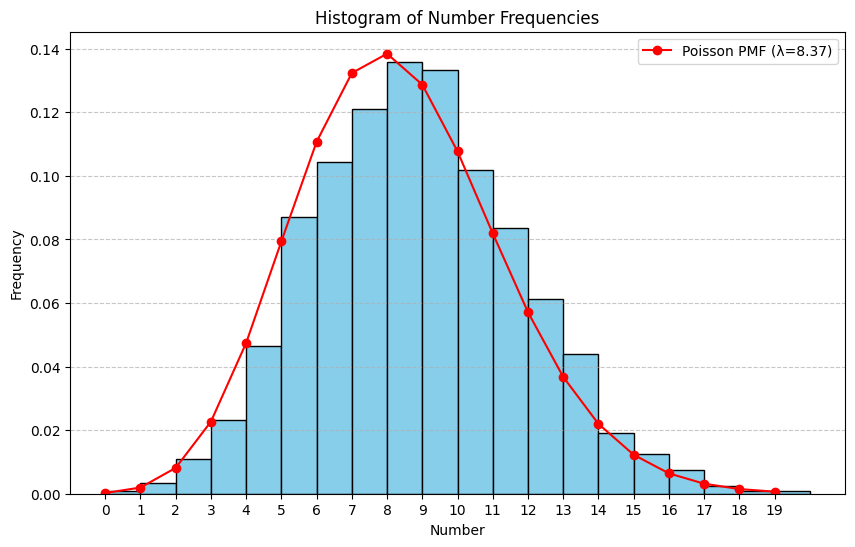

In [ ]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here

# Extract columns as lists
number_list = df_alpha['Number'].tolist()
frequency_list = df_alpha['Frequency'].tolist()

print(frequency_list)

number_list = number_list[:-1]
frequency_list = frequency_list[:-1]

number_list_int = [int(x) for x in number_list]
frequency_list_int = [int(x) for x in frequency_list]


alpha_emissions = []
for i in number_list_int:  # Assuming number_list contains integer indices
    count = frequency_list_int[i]  # Access with integer index
    alpha_emissions.extend([i] * count)


x_values = np.arange(0, max(alpha_emissions) + 1)

lambda_poisson = np.mean(alpha_emissions)

plt.figure(figsize=(10, 6))
plt.hist(alpha_emissions, bins=range(min(alpha_emissions), max(alpha_emissions) + 2), color='skyblue', edgecolor='black',density = True)

pmf_values = stats.poisson.pmf(x_values, mu=lambda_poisson)
plt.plot(x_values, pmf_values, 'o-', color='red', label=f'Poisson PMF (λ={lambda_poisson:.2f})')

plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Histogram of Number Frequencies")
plt.xticks(number_list_int)  # Show each number on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# End your code here


Traffic violation dataset: data on traffic and pedestrian stops by police in rhode island from January 1 2005 to December 30 2015. The data has many attributes but in this assignment we will only focus on some of the attributes

In [5]:
## Loading the dataset as a pandas dataframe and printing the header
df_police = pd.read_csv('police_project.csv')
df_police.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Process the dataframe and create a new dataframe with the following structure:

- Rows correspond to the stop date

- Column 1 correspond to the total number of speeding violations on that stop date

- Column 2 correspond to the total number of drug related stops on that stop date

- Column 3 correspond to the total number of stops by police on that stop date

After you have created the dataframe, print the header of the dataframe.

In [28]:
## Helpful functions: df.reset_index().groupby().agg()

# Start your code here
# Assuming 'df' is the dataframe provided above
def process_dataframe(df):
    # Add a new column to flag speeding violations (True if 'violation' is 'Speeding')
    df['speeding_violation'] = df['violation'] == 'Speeding'

    # Group by 'stop_date' and aggregate the required columns
    result_df = df.groupby('stop_date').agg(
        total_speeding_violations=('speeding_violation', 'sum'),  # Sum of True values in 'speeding_violation'
        total_drug_related_stops=('drugs_related_stop', 'sum'),   # Sum of True values in 'drugs_related_stop'
        total_stops=('stop_date', 'size')  # Count the number of stops per date
    ).reset_index()

    #Print the header of the new dataframe
    return result_df

print(process_dataframe(df_police).head())
# End your code here

    stop_date  total_speeding_violations  total_drug_related_stops  \
0  2005-01-02                          1                         0   
1  2005-01-18                          1                         0   
2  2005-01-23                          1                         0   
3  2005-02-20                          0                         0   
4  2005-03-14                          1                         0   

   total_stops  
0            1  
1            1  
2            1  
3            1  
4            1  


Plot a normalized histogram of the total number of stops by police in a day: total number of stops by police in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the normalized histogram on the same graph.

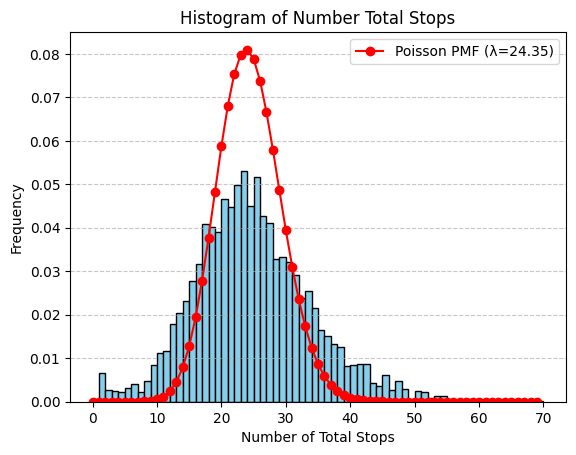

In [29]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here
x_values = np.arange(0, max(process_dataframe(df_police)['total_stops']) + 1)
lambda_poisson = np.mean(process_dataframe(df_police)['total_stops'])
plt.hist(process_dataframe(df_police)['total_stops'], density = True, bins=range(min(process_dataframe(df_police)['total_stops']), max(process_dataframe(df_police)['total_stops']) + 2), color='skyblue', edgecolor='black')

pmf_values = stats.poisson.pmf(x_values, mu=lambda_poisson)
plt.plot(x_values, pmf_values, 'o-', color='red', label=f'Poisson PMF (λ={lambda_poisson:.2f})')

plt.xlabel("Number of Total Stops")
plt.ylabel("Frequency")
plt.title("Histogram of Number Total Stops")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# End your code here
pass

# End your code here



Plot a normalized histogram of the total number of speeding violations in a day: total number of speeding violations in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the normalized histogram on the same graph.

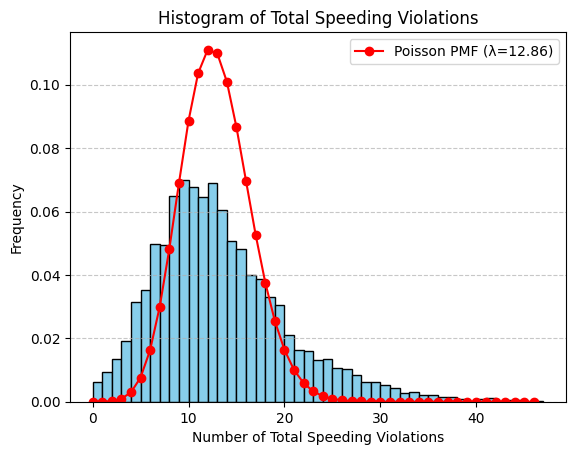

In [32]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here
x_values = np.arange(0, max(process_dataframe(df_police)['total_speeding_violations']) + 1)
lambda_poisson = np.mean(process_dataframe(df_police)['total_speeding_violations'])
plt.hist(process_dataframe(df_police)['total_speeding_violations'], density = True, bins=range(min(process_dataframe(df_police)['total_speeding_violations']), max(process_dataframe(df_police)['total_speeding_violations']) + 2), color='skyblue', edgecolor='black')

pmf_values = stats.poisson.pmf(x_values, mu=lambda_poisson)
plt.plot(x_values, pmf_values, 'o-', color='red', label=f'Poisson PMF (λ={lambda_poisson:.2f})')

plt.xlabel("Number of Total Speeding Violations")
plt.ylabel("Frequency")
plt.title("Histogram of Total Speeding Violations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

pass

# End your code here



Plot the un-normalized histogram of the total number of drug related stops in a day: total number of drug related stops in the horizontal axis and the frequency in the vertical axis. Which discrete random variable can fit the empirical distribution well?

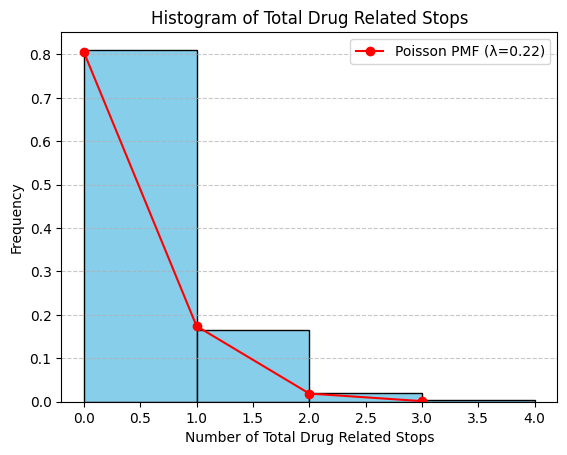

In [33]:
## Helpful functions: plt.hist()

# Start your code here
x_values = np.arange(0, max(process_dataframe(df_police)['total_drug_related_stops']) + 1)
lambda_poisson = np.mean(process_dataframe(df_police)['total_drug_related_stops'])
plt.hist(process_dataframe(df_police)['total_drug_related_stops'], density = True, bins=range(min(process_dataframe(df_police)['total_drug_related_stops']), max(process_dataframe(df_police)['total_drug_related_stops']) + 2), color='skyblue', edgecolor='black')

pmf_values = stats.poisson.pmf(x_values, mu=lambda_poisson)
plt.plot(x_values, pmf_values, 'o-', color='red', label=f'Poisson PMF (λ={lambda_poisson:.2f})')

plt.xlabel("Number of Total Drug Related Stops")
plt.ylabel("Frequency")
plt.title("Histogram of Total Drug Related Stops")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

pass

# End your code here

